In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['class']

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
param_grid= {'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}
model = GradientBoostingClassifier()
grid = GridSearchCV(model,param_grid)

In [8]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [9]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [10]:
p = grid.predict(X_test)

In [11]:
accuracy_score(y_test,p)

1.0

In [12]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [13]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [14]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.83233771e-16, 0.00000000e+00, 0.00000000e+00,
       7.75808690e-17, 1.05030313e-03, 6.83819041e-18, 1.95092305e-17,
       0.00000000e+00, 1.99071617e-17, 8.44505915e-18, 0.00000000e+00,
       6.04370852e-17, 0.00000000e+00, 0.00000000e+00, 2.22085608e-08,
       2.42084559e-03, 5.17953994e-02, 6.24175887e-04, 1.38735267e-02,
       1.82499853e-02, 1.23421695e-03, 6.14744334e-01, 8.63939501e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29416465e-02,
       1.07276150e-02, 0.00000000e+00, 2.01877950e-16, 1.02661254e-17,
       1.01388231e-17, 0.00000000e+00, 0.00000000e+00, 2.59310001e-17,
       1.11045550e-17, 0.00000000e+00, 3.41957065e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.35972972e-01, 0.00000000e+00,
       2.94984224e-02, 4.83055163e-04, 1.63280628e-03, 4.95063766e-06,
       0.00000000e+00, 0.00000000e+00, 3.97341178e-02, 1.52331903e-04,
       0.00000000e+00, 0.00000000e+00, 6.76478844e-04, 0.00000000e+00,
      

In [16]:
feature_impor = grid.best_estimator_.feature_importances_
important_features = pd.DataFrame(index=X.columns,data=feature_impor,columns=['Importance'])

In [17]:
important_features

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,2.832338e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,7.758087e-17
...,...
habitat_l,0.000000e+00
habitat_m,1.550954e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [22]:
important_features = important_features[important_features['Importance'] > 0.005]
important_features = important_features.sort_values('Importance')

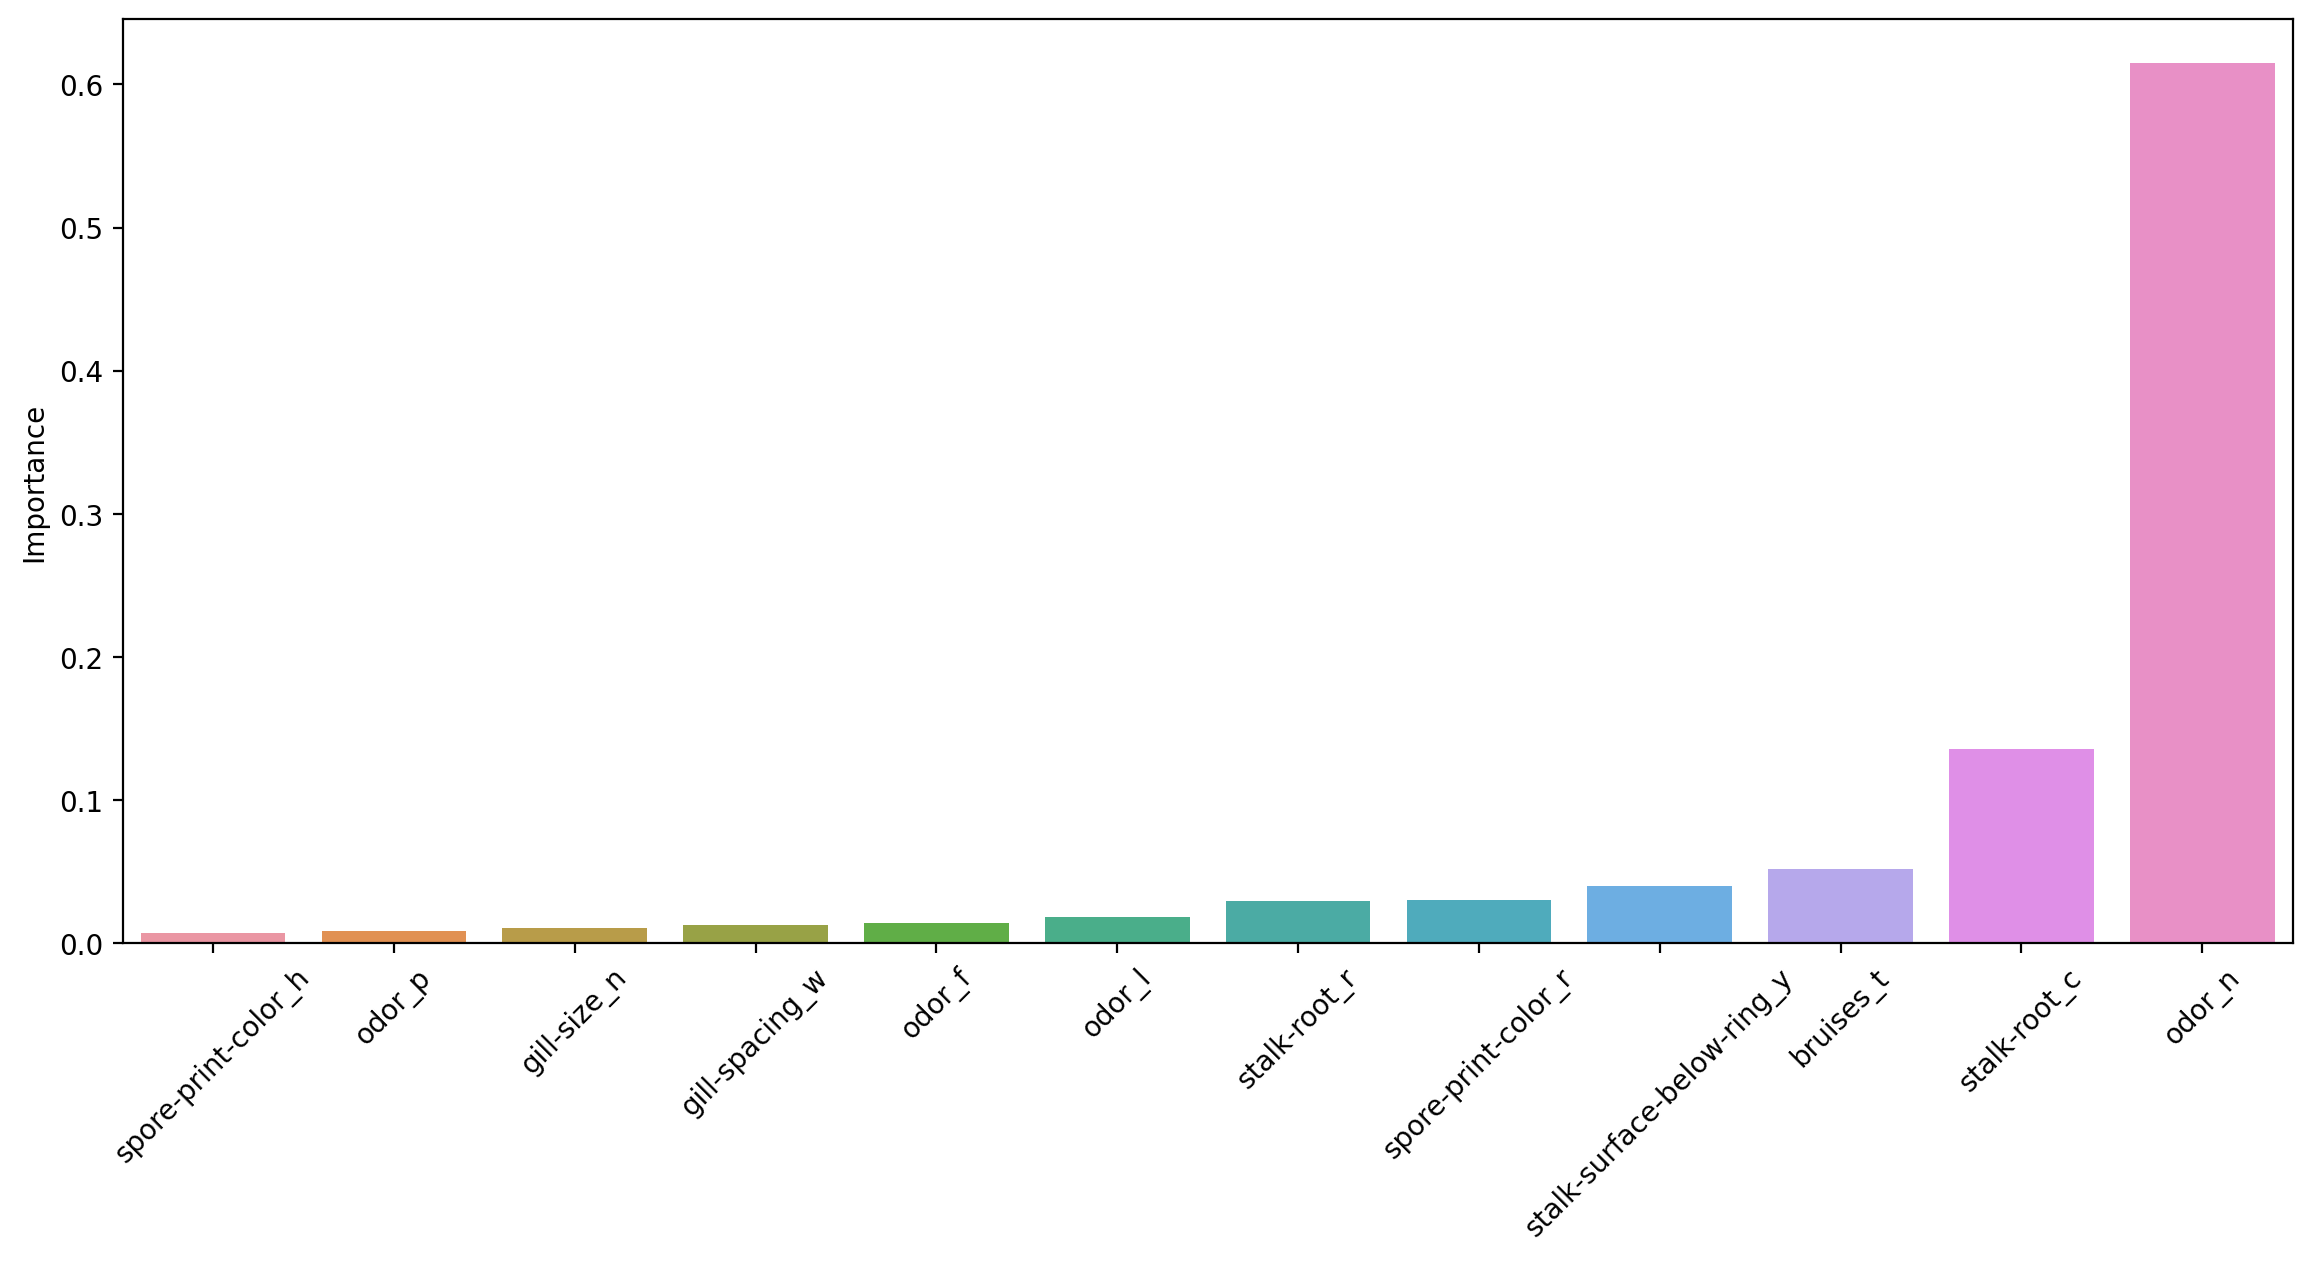

In [23]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=important_features,x=important_features.index,y='Importance')
plt.xticks(rotation=45);